In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv("fake_reg.csv")

In [ ]:
df1.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('drive/MyDrive/Colab Notebooks/DATA/fake_reg.csv')

In [ ]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

In [ ]:
df.shape

(1000, 3)

In [ ]:
df.isnull().sum().any()

False

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


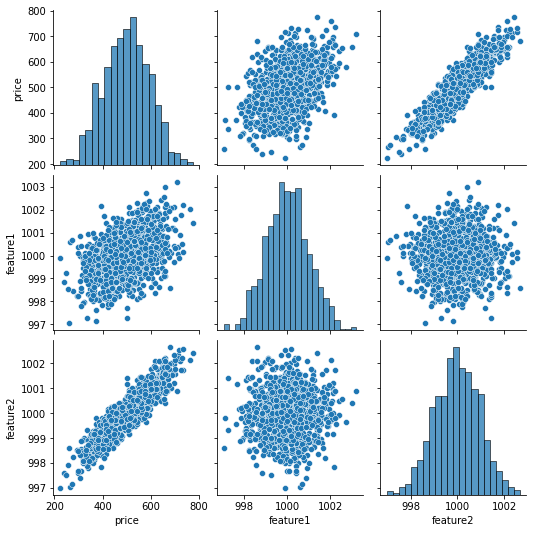

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

price  feature1  feature2
price     1.000000  0.444190  0.907576
feature1  0.444190  1.000000  0.030607
feature2  0.907576  0.030607  1.000000

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[["feature1", "feature2"]].values

In [ ]:
y=df["price"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(700, 2)

In [ ]:
X_train

array([[1001.63407565,  998.80950388],
       [ 999.76150137,  998.41802414],
       [ 998.2638401 , 1000.92030063],
       ...,
       [1000.47386523, 1001.44542815],
       [ 998.8625673 ,  999.15662112],
       [1000.55690247,  999.35441706]])

In [ ]:
#scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train.min()

0.0

In [ ]:
X_train.max()

1.0

TensorFlow Syntax
(use %tensorflow_version 1.x to use old versions of tf)

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Activation

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation="relu"))           #input_dim = 2  or input_dim = X_train.shape[0]
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="rmsprop", loss="mse")

In [ ]:
model.fit(X_train, y_train, batch_size=16, epochs=250)

Epoch 1/250
44/44 [==============================] - 1s 1ms/step - loss: 258530.9017
Epoch 2/250
44/44 [==============================] - 0s 1ms/step - loss: 256598.0663
Epoch 3/250
44/44 [==============================] - 0s 1ms/step - loss: 254146.9833
Epoch 4/250
44/44 [==============================] - 0s 906us/step - loss: 256403.8434
Epoch 5/250
44/44 [==============================] - 0s 929us/step - loss: 257877.0830
Epoch 6/250
44/44 [==============================] - 0s 925us/step - loss: 251312.1941
Epoch 7/250
44/44 [==============================] - 0s 987us/step - loss: 255821.5597
Epoch 8/250
44/44 [==============================] - 0s 975us/step - loss: 251652.0396
Epoch 9/250
44/44 [==============================] - 0s 908us/step - loss: 247638.4656
Epoch 10/250
44/44 [==============================] - 0s 897us/step - loss: 247405.6941
Epoch 11/250
44/44 [==============================] - 0s 950us/step - loss: 249104.7951
Epoch 12/250
44/44 [===========================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df=pd.DataFrame(model.history.history)

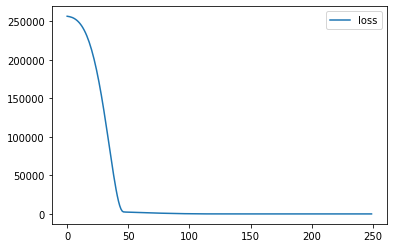

In [ ]:
loss_df.plot()

(0.0, 50.0)

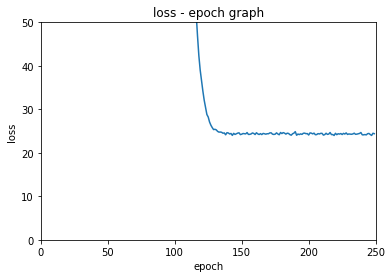

In [ ]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0,250]) # focusing on the given x values
ax.set_ylim([0,50]) # focusing on the given y values

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
eval_metrics(y_test, y_pred)

r2_score: 0.996926520840358 
 mae: 4.18122329518015 
 mse: 27.022126094558214 
 rmse: 5.198281071138633


In [ ]:
y_test.shape

(300,)

In [ ]:
y_pred.shape

(300, 1)

In [ ]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(300,)}
compare=pd.DataFrame(my_dict)

In [ ]:
compare.sample(5)

Actual        Pred
241  496.890477  501.618713
17   657.718680  658.137634
69   521.796992  515.020264
273  375.959380  380.470612
207  367.160966  360.820709

In [ ]:
model.evaluate(X_train, y_train, verbose=0)

27.225183486938477

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

27.02212142944336

In [ ]:
import seaborn as sns

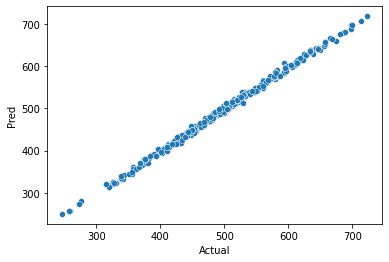

In [ ]:
sns.scatterplot(x="Actual", y="Pred", data=compare)

In [ ]:
# making predictions with the model

In [ ]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

In [ ]:
new_data =[[999, 1001]]

In [ ]:
new_data=scaler.transform(new_data)

In [ ]:
new_data

array([[0.30608328, 0.71932348]])

In [ ]:
model.predict(new_data)[0][0]

546.65454

In [ ]:
# saving and loading the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("my_model.h5")

In [ ]:
loaded_model=load_model("my_model.h5")

In [ ]:
new_data

array([[0.30608328, 0.71932348]])

In [ ]:
loaded_model.predict(new_data)

array([[546.65454]], dtype=float32)